# Principle Component Analysis

"Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. 

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible."[source](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

![Image](pca1.gif)

In [1]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [3]:
df = pd.DataFrame(columns=[*wt, *ko], index = genes)

In [4]:
df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in df.index:
    df.loc[gene, 'wt1' : 'wt5'] = np.random.poisson(lam=rd.randrange(100, 10000), size = 5)
    df.loc[gene, 'ko1' : 'ko5'] = np.random.poisson(lam=rd.randrange(100, 10000), size = 5)

In [6]:
df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,677,661,649,686,665,1750,1715,1715,1742,1707
gene2,7147,7350,7376,7259,7420,2176,2125,2181,2152,2115
gene3,936,884,930,953,933,2466,2440,2410,2425,2390
gene4,5820,5953,5850,5891,5855,8024,8140,8141,8028,8054
gene5,7803,7831,7804,7716,7777,8554,8409,8347,8435,8292


In [13]:
# you can also use the standard caller from sklearn

# its a must to transpose the data before scalling it.
scaled_df = preprocessing.scale(df.T)
scaled_df

array([[-0.9818381 ,  0.93631748, -0.98773152, -1.04778595, -0.92375158,
        -0.9808525 ,  0.91384415, -1.07086689, -1.08213691, -0.92088766,
         0.99099526,  0.94305626, -0.99463296, -1.00463281,  0.74903909,
         1.0526497 ,  1.01104589, -1.00846745, -1.0022984 , -0.99413889,
         1.0136335 ,  1.02167066,  0.75254177,  1.03476297, -0.97823732,
         1.02585664, -1.00232772,  1.00100124,  0.98313529,  1.00900306,
         1.02433033,  1.01875559,  1.15627097, -1.12519941, -0.97270335,
         0.87588916, -1.00513038, -0.98527394, -1.00820521,  0.17660019,
        -1.01216531,  0.8269459 , -1.14466984,  0.97817043, -0.96728989,
        -0.9949964 , -1.00317521,  0.93897334, -0.81789426,  0.96799197,
         0.78629221, -1.00330621, -1.02783757, -0.92139874,  0.98433997,
        -0.97387593,  0.95440948, -0.99145692, -0.98551709,  0.9450635 ,
        -0.69746133,  0.96092581, -1.01418442, -0.92348666,  0.87119103,
         0.34743919, -1.04303303,  0.93907245,  0.9

In [8]:
pca = PCA()

In [9]:
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)

In [10]:
per_var = np.round(pca.explained_variance_ratio_, decimals = 1)

In [11]:
# labels for the pcas
labels = ["PC" + str(i) for i in range(1, len(per_var)+1)]

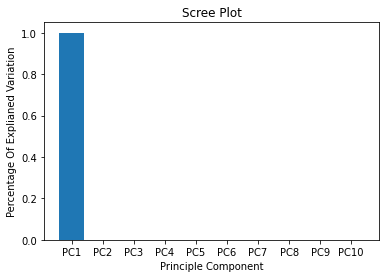

In [12]:
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.xlabel("Principle Component")
plt.ylabel("Percentage Of Explianed Variation")
plt.title("Scree Plot")
plt.show()

The other PCs are the noise, these are the PCs with no to little core information but, the first core has most of the information.

In [16]:
pca_df = pd.DataFrame(pca_data, columns = labels, index = [*wt, *ko])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.569347,1.503763,1.555832,-0.116862,-0.143078,-0.286772,-0.028870,-0.064337,0.185410,2.844947e-16
wt2,9.847190,-0.901422,-0.990163,-0.462764,-0.422588,-0.321441,-0.317246,-0.302719,0.028369,-5.807854e-15
wt3,10.022799,-1.154657,-0.035007,-0.153110,0.448753,0.398005,0.387210,0.035363,0.303442,-9.089951e-16
wt4,9.979757,0.899588,-0.633180,0.264860,0.734420,-0.082472,-0.226944,0.017033,-0.266849,-3.271688e-15
wt5,10.006975,-0.334616,0.144698,0.457237,-0.621129,0.287016,0.175449,0.310890,-0.248704,-1.717376e-15


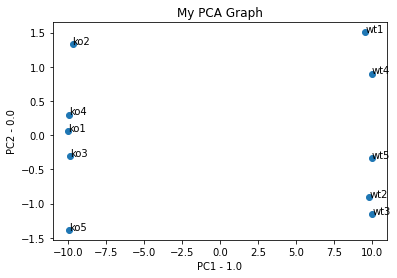

In [20]:
plt.scatter(x = pca_df.PC1, y = pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel(f"PC1 - {per_var[0]}")
plt.ylabel(f"PC2 - {per_var[1]}")
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

The seperation indicates that, the two groups of genes are seperated from each other. The ones on a similar side indicate high level correlation to each other.

In [23]:
loading_scores = pd.Series(pca.components_[0], index = genes)
loading_scores = loading_scores.abs().sort_values(ascending = False)
top_ten = loading_scores[0: 10].index.values
loading_scores[top_ten]

gene70    0.101145
gene59    0.101144
gene6     0.101144
gene62    0.101141
gene20    0.101140
gene38    0.101139
gene47    0.101138
gene55    0.101138
gene52    0.101136
gene17    0.101133
dtype: float64

These values are similar indicating that they all played a role in separating the values.